<a href="https://colab.research.google.com/github/dani16antonio/Artificial-Intelligence-examles/blob/master/mnist-NN-simple-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import dependencies
from keras.activations import relu, softmax
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt

import numpy as np

In [11]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# defining hyper-parameters
num_layers = 2
num_neurons = []
num_neurons_per_layer = 256
learnning_rate = 0.01
num_epochs = 50
batch_size = 100
num_outputs = 10  # 0-9 digits
num_inputs = 28 * 28  # total pixels per image
for i in range(num_layers):
    num_neurons.append(num_neurons_per_layer)

In [13]:
# data processing
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
X_train = X_train.reshape(len(X_train), num_inputs)
X_test = X_test.reshape(len(X_test), num_inputs)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)
Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]

1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]

etc.

In [0]:
Y_train = np_utils.to_categorical(y_train, num_outputs)
Y_test = np_utils.to_categorical(y_test, num_outputs)

In [0]:
# create model
model = Sequential(name='digits')
model.add(Dense(units=num_neurons[0], activation=relu, input_shape=(num_inputs,)))
model.add(Dense(units=num_neurons[1], activation=relu))
model.add(Dense(units=num_outputs, activation=softmax))

In [16]:
# model's summary
model.summary()

Model: "digits"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compiling model
model.compile(
        loss=categorical_crossentropy,
        optimizer=SGD(lr=learnning_rate),
        metrics=['accuracy'])

In [18]:
# train model
model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





60000/60000 [==============================] - 5s 78us/step - loss: 1.0101 - acc: 0.7668
Epoch 2/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.4121 - acc: 0.8884
Epoch 3/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.3402 - acc: 0.9043
Epoch 4/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.3044 - acc: 0.9144
Epoch 5/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.2802 - acc: 0.9206
Epoch 6/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.2609 - acc: 0.9262
Epoch 7/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.2445 - acc: 0.9318
Epoch 8/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.2302 - acc: 0.9354
Epoch 9/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.2176 - acc: 0.939

In [19]:
# evaluate model
score = model.evaluate(X_test, Y_test)
print('Test - acurracy', str(score[1]*100)+'%.')

10000/10000 [==============================] - 0s 41us/step
Test - acurracy 97.31%.


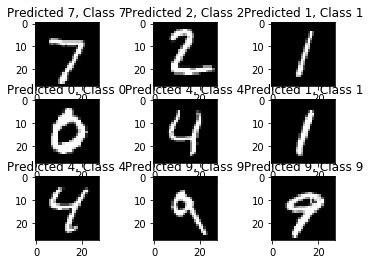

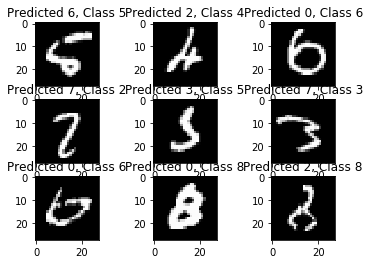

In [24]:
# inspecting output
predicted_classes = model.predict_classes(X_test)
# verificar cuáles predicciones son correctas y cuáles no
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))